# Importing the Libraries

In [ ]:
import time
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import array
import os
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#import posenet

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import TensorBoard
import tensorflow as tf
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# This is the posedetector function which helps us to detect pose

In [ ]:

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

width = 368
height = 368                                            # setting up the
                                                        # deafult values
net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
thr = 0.6

def poseDetector(image):
    imageWidth = image.shape[1]
    imageHeight = image.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(image, 1.0, (width, height), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  #basically its just here because we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # taking heatmap of respective body's part.
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (imageWidth* point[0]) / out.shape[3]
        y = (imageHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        From = pair[0]
        To = pair[1]
        assert(From in BODY_PARTS)
        assert(To in BODY_PARTS)

        idFrom = BODY_PARTS[From]
        idTo = BODY_PARTS[To]

        if points[idFrom] and points[idTo]:
            cv.line(image, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(image, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(image, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()

    return image

# This is for accesing and preprocessing the training and testing files

In [ ]:
poses = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
feature=[]
feature_test=[]
labels = []
labels_test=[]
def create_train(DIR,label,feat):
    for person in poses:
        path = os.path.join(DIR, person)
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            img_array = cv.imread(img_path)
            if img_array is None:
                continue 
            else:
                
                resize_width = int(400)
                resize_hieght = int(400)
                resized_dimentions = (resize_width, resize_hieght)
  
    # Create resized image using the calculated dimentions
                resized_image = cv.resize(img_array, resized_dimentions,
                               interpolation=cv.INTER_AREA)
                frame = poseDetector(resized_image)
                #frame_new=cv.imread(img_path)
                #if(frame.shape[2]==frame_new.shape[2]):
                    #frame_diff=frame-frame_new
                feat.append(frame)
                label.append(person)

start=time.time()
pose=create_train(r'drive/My Drive/yoga pose/Train',labels,feature)
pose_t = create_train(r'drive/My Drive/yoga pose/Test',labels_test,feature_test)
end=time.time()
print('preprocessing done at:- ')
print({end-start})

KeyboardInterrupt: ignored

# this was used to dump our collected features so we can use them later

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
pickle.dump(feature, open('drive/My Drive/X.pkl', 'wb'))
pickle.dump(feature_test, open('drive/My Drive/y.pkl', 'wb'))
pickle.dump(labels, open('drive/My Drive/Xl.pkl', 'wb'))
pickle.dump(labels_test, open('drive/My Drive/yl.pkl', 'wb'))

NameError: ignored

In [ ]:

import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("drive/MyDrive/yoga pose/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
train = open('/content/drive/MyDrive/yoga pose/Train', 'rb')
test = open('drive/MyDrive/yoga pose/Test', 'rb')

There are 2 directories and 0 images in 'drive/MyDrive/yoga pose/'.
There are 5 directories and 0 images in 'drive/MyDrive/yoga pose/Train'.
There are 0 directories and 229 images in 'drive/MyDrive/yoga pose/Train/downdog'.
There are 0 directories and 147 images in 'drive/MyDrive/yoga pose/Train/goddess'.
There are 0 directories and 152 images in 'drive/MyDrive/yoga pose/Train/tree'.
There are 0 directories and 240 images in 'drive/MyDrive/yoga pose/Train/plank'.
There are 0 directories and 243 images in 'drive/MyDrive/yoga pose/Train/warrior2'.
There are 5 directories and 0 images in 'drive/MyDrive/yoga pose/Test'.
There are 0 directories and 115 images in 'drive/MyDrive/yoga pose/Test/plank'.
There are 0 directories and 109 images in 'drive/MyDrive/yoga pose/Test/warrior2'.
There are 0 directories and 97 images in 'drive/MyDrive/yoga pose/Test/downdog'.
There are 0 directories and 80 images in 'drive/MyDrive/yoga pose/Test/goddess'.
There are 0 directories and 69 images in 'drive/MyD

IsADirectoryError: ignored

## using image data generator for loading our images 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator( rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:


# Setup the train and test directories
train_dir = "/content/drive/MyDrive/yoga pose/Train/"
test_dir = "/content/drive/MyDrive/yoga pose/Test/"


# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224,224), # convert all images to be 224 x 2
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)



Found 936 images belonging to 5 classes.
Found 432 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_1 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
  #Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2),
  #Conv2D(64, 3, activation='relu'),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2),
  #Conv2D(96, 3, activation='relu'),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(5, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_1.compile( loss= tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


UnknownError: ignored

# loading our dumped features 

In [ ]:
import pickle
X = pickle.load(open('drive/My Drive/X.pkl', 'rb'))
y = pickle.load(open('drive/My Drive/Xl.pkl', 'rb'))
Xt = pickle.load(open('drive/My Drive/y.pkl', 'rb'))
yt = pickle.load(open('drive/My Drive/yl.pkl', 'rb'))

In [ ]:
import numpy as np
import pandas as pd

X=np.array(X)
y=pd.DataFrame(y,columns=['position'])
Xt=np.array(Xt)
yt=pd.DataFrame(yt,columns=['position'])

In [ ]:
x=X/X.max()
xt=Xt/Xt.max()

In [ ]:

y=pd.get_dummies(y['position'])
yt=pd.get_dummies(yt['position'])


In [ ]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
xt=tf.cast(tf.constant(xt),dtype=tf.float32)
yt=tf.cast(tf.constant(yt),dtype=tf.float32)

# This part is for different models and seeing their results

In [ ]:
# Set random seed
tf.random.set_seed(42)


# 1. Create the model (this time 3 layers)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(400,400,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(96, (3,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
   
    tf.keras.layers.Dense(96, activation = 'relu'),
    tf.keras.layers.Dense(96, activation = 'relu'),
    #tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dropout(0.50),

    tf.keras.layers.Dense(5, activation = 'softmax')
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model

history_1=model_1.fit(x, y,epochs=15)

model_1.save('drive/My Drive/classification_model')

Epoch 1/15
32/32 [==============================] - 45s 296ms/step - loss: 4.7360 - accuracy: 0.2207
Epoch 2/15
32/32 [==============================] - 9s 296ms/step - loss: 1.4428 - accuracy: 0.3777
Epoch 3/15
32/32 [==============================] - 9s 295ms/step - loss: 1.2504 - accuracy: 0.4851
Epoch 4/15
32/32 [==============================] - 9s 294ms/step - loss: 1.0352 - accuracy: 0.5924
Epoch 5/15
32/32 [==============================] - 9s 295ms/step - loss: 0.9014 - accuracy: 0.6590
Epoch 6/15
32/32 [==============================] - 9s 295ms/step - loss: 0.7330 - accuracy: 0.7107
Epoch 7/15
32/32 [==============================] - 9s 295ms/step - loss: 0.5610 - accuracy: 0.8012
Epoch 8/15
32/32 [==============================] - 9s 297ms/step - loss: 0.4547 - accuracy: 0.8360
Epoch 9/15
32/32 [==============================] - 9s 296ms/step - loss: 0.3122 - accuracy: 0.8956
Epoch 10/15
32/32 [==============================] - 9s 296ms/step - loss: 0.2547 - accuracy: 0.918

In [ ]:
# Set random seed
tf.random.set_seed(42)


# 1. Create the model (this time 3 layers)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(400,400,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    tf.keras.layers.Conv2D(96, (3,3)),
    tf.keras.layers.Conv2D(96, (3,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

    
    tf.keras.layers.Flatten(),
   

    tf.keras.layers.Dense(96, activation = 'relu'),
    #tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dropout(0.50),

    tf.keras.layers.Dense(5, activation = 'softmax')
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model

history_2=model_2.fit(x, y,epochs=15)

#model_3.save('drive/My Drive/classification_model')

Epoch 1/15
32/32 [==============================] - 25s 744ms/step - loss: 3.1803 - accuracy: 0.2674
Epoch 2/15
32/32 [==============================] - 24s 738ms/step - loss: 1.4365 - accuracy: 0.4006
Epoch 3/15
32/32 [==============================] - 24s 737ms/step - loss: 1.2008 - accuracy: 0.5179
Epoch 4/15
32/32 [==============================] - 24s 739ms/step - loss: 1.0864 - accuracy: 0.5487
Epoch 5/15
32/32 [==============================] - 24s 739ms/step - loss: 0.9282 - accuracy: 0.6272
Epoch 6/15
32/32 [==============================] - 24s 738ms/step - loss: 0.8183 - accuracy: 0.6710
Epoch 7/15
32/32 [==============================] - 24s 739ms/step - loss: 0.7398 - accuracy: 0.7107
Epoch 8/15
32/32 [==============================] - 24s 738ms/step - loss: 0.6173 - accuracy: 0.7535
Epoch 9/15
32/32 [==============================] - 24s 736ms/step - loss: 0.5513 - accuracy: 0.7753
Epoch 10/15
32/32 [==============================] - 24s 737ms/step - loss: 0.4146 - accura

In [ ]:
model_2.evaluate(xt,yt)

15/15 [==============================] - 4s 262ms/step - loss: 1.1580 - accuracy: 0.7043


[1.1579604148864746, 0.7042553424835205]

In [ ]:
# Set random seed
tf.random.set_seed(42)


# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(224,224,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    tf.keras.layers.Conv2D(96, (3,3)),
    tf.keras.layers.Conv2D(96, (3,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

    
    tf.keras.layers.Flatten(),
   

    tf.keras.layers.Dense(96, activation = 'relu'),
    #tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dropout(0.50),

    tf.keras.layers.Dense(5, activation = 'softmax')
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model

history=model_3.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Epoch 1/5
 6/30 [=====>........................] - ETA: 8:04 - loss: 4.8605 - accuracy: 0.2500

KeyboardInterrupt: ignored

In [ ]:
model_3.evaluate(xt,yt)

15/15 [==============================] - 3s 189ms/step - loss: 1.5911 - accuracy: 0.7319


[1.591149091720581, 0.7319148778915405]

In [ ]:
# Set random seed
tf.random.set_seed(42)

from keras.callbacks import EarlyStopping
# 1. Create the model (this time 3 layers)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(400,400,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.25),


    
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    

    
    tf.keras.layers.Conv2D(96, (3,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.50),

    
    tf.keras.layers.Flatten(),
   
    #tf.keras.layers.Dense(96, activation = 'relu'),
    #tf.keras.layers.Dense(10, activation = 'relu'),


    tf.keras.layers.Dense(5, activation = 'softmax')
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy']
                )

# 3. Fit the model

history_4=model_4.fit(x, 
                      y,
                      epochs=15,
                      validation_data=(xt, yt))
                      #callbacks = [EarlyStopping(monitor='val_accuracy', patience=2)])

Epoch 1/15
32/32 [==============================] - 11s 330ms/step - loss: 5.0974 - accuracy: 0.2137 - val_loss: 6.1204 - val_accuracy: 0.1447
Epoch 2/15
32/32 [==============================] - 10s 320ms/step - loss: 1.6092 - accuracy: 0.2157 - val_loss: 2.7602 - val_accuracy: 0.1638
Epoch 3/15
32/32 [==============================] - 10s 320ms/step - loss: 1.6055 - accuracy: 0.2425 - val_loss: 2.8414 - val_accuracy: 0.1787
Epoch 4/15
32/32 [==============================] - 10s 322ms/step - loss: 1.6023 - accuracy: 0.2445 - val_loss: 3.2316 - val_accuracy: 0.1936
Epoch 5/15
 6/32 [====>.........................] - ETA: 7s - loss: 1.5983 - accuracy: 0.2760

KeyboardInterrupt: ignored

In [ ]:
model_4.evaluate(xt,yt)

15/15 [==============================] - 2s 107ms/step - loss: 2.0102 - accuracy: 0.7085


[2.010165214538574, 0.7085106372833252]

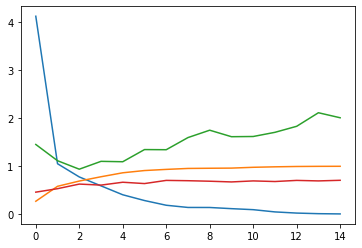

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history_4.history))

In [ ]:
# Set random seed
tf.random.set_seed(42)


# 1. Create the model (this time 3 layers)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(400,400,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.25)

    
    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    tf.keras.layers.Flatten(),
   
    #tf.keras.layers.Dense(96, activation = 'relu'),
    #tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dropout(0.50),

    tf.keras.layers.Dense(5, activation = 'softmax')
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model

history_5=model_5.fit(x, y,epochs=10)

Epoch 1/10
32/32 [==============================] - 8s 192ms/step - loss: 1.8666 - accuracy: 0.4066
Epoch 2/10
32/32 [==============================] - 6s 178ms/step - loss: 0.9431 - accuracy: 0.6382
Epoch 3/10
32/32 [==============================] - 6s 177ms/step - loss: 0.6344 - accuracy: 0.7793
Epoch 4/10
32/32 [==============================] - 6s 176ms/step - loss: 0.4507 - accuracy: 0.8360
Epoch 5/10
32/32 [==============================] - 6s 176ms/step - loss: 0.3152 - accuracy: 0.8996
Epoch 6/10
32/32 [==============================] - 6s 177ms/step - loss: 0.1906 - accuracy: 0.9384
Epoch 7/10
32/32 [==============================] - 6s 179ms/step - loss: 0.1359 - accuracy: 0.9573
Epoch 8/10
32/32 [==============================] - 6s 179ms/step - loss: 0.0947 - accuracy: 0.9712
Epoch 9/10
32/32 [==============================] - 6s 179ms/step - loss: 0.0963 - accuracy: 0.9722
Epoch 10/10
32/32 [==============================] - 6s 178ms/step - loss: 0.0735 - accuracy: 0.9861

In [ ]:
model_5.evaluate(xt,yt)

15/15 [==============================] - 2s 114ms/step - loss: 1.5686 - accuracy: 0.7085


[1.5685993432998657, 0.7085106372833252]

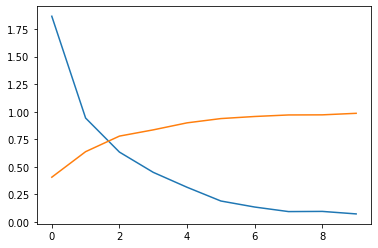

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history_5.history))

In [ ]:
# Set random seed
tf.random.set_seed(42)


# 1. Create the model (this time 3 layers)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(400,400,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(, (3,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.20),

    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.50),
    
    tf.keras.layers.Flatten(),
    

    tf.keras.layers.Dense(5, activation = 'softmax')
    
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model

history_6=model_6.fit(x, y,epochs=10)

Epoch 1/10
32/32 [==============================] - 7s 187ms/step - loss: 5.5980 - accuracy: 0.2823
Epoch 2/10
32/32 [==============================] - 6s 183ms/step - loss: 0.9765 - accuracy: 0.6213
Epoch 3/10
32/32 [==============================] - 6s 184ms/step - loss: 0.6423 - accuracy: 0.7823
Epoch 4/10
32/32 [==============================] - 6s 184ms/step - loss: 0.4155 - accuracy: 0.8807
Epoch 5/10
32/32 [==============================] - 6s 184ms/step - loss: 0.2740 - accuracy: 0.9304
Epoch 6/10
32/32 [==============================] - 6s 184ms/step - loss: 0.1579 - accuracy: 0.9652
Epoch 7/10
32/32 [==============================] - 6s 186ms/step - loss: 0.1004 - accuracy: 0.9811
Epoch 8/10
32/32 [==============================] - 6s 185ms/step - loss: 0.0881 - accuracy: 0.9831
Epoch 9/10
32/32 [==============================] - 6s 186ms/step - loss: 0.1006 - accuracy: 0.9781
Epoch 10/10
32/32 [==============================] - 6s 184ms/step - loss: 0.0909 - accuracy: 0.9801

In [ ]:
model_6.evaluate(xt,yt)

15/15 [==============================] - 1s 81ms/step - loss: 2.5208 - accuracy: 0.5745


[2.520808219909668, 0.5744680762290955]

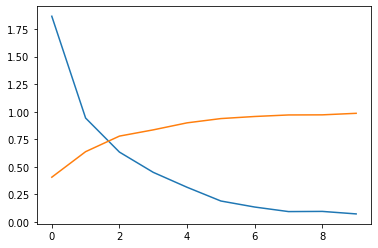

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(history_6.history))

In [ ]:
import tensorflow as tf
loaded_saved_model = tf.keras.models.load_model("drive/MyDrive/classification_model")
loaded_saved_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 398, 398, 32)      896       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 199, 199, 32)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 197, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 98, 98, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 96, 96, 96)      

3
49


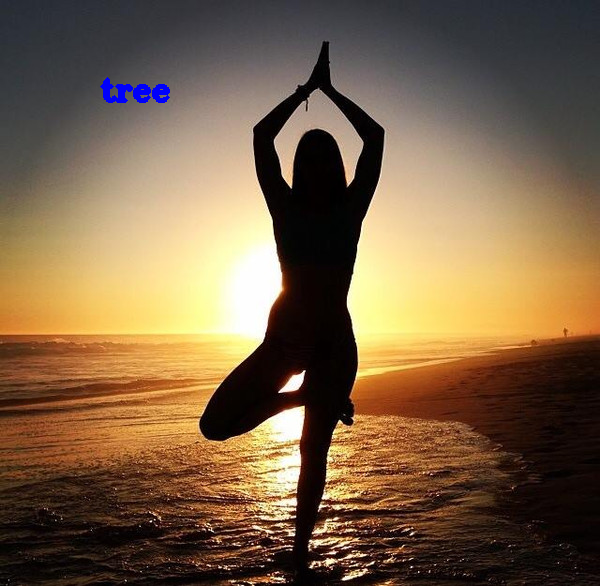

In [ ]:
labels=['downdog','goddess','plank','tree','warrior2']
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
#while True:
lables=["downdog","goddess","plank","tree","warrior2"]
labl=random.randint(0,4)
print(labl)
num=random.randint(10,60)
numy=str(num)
print(numy)
dir='drive/MyDrive/yoga pose/Test/'+ lables[labl] + '/' + '000000'+ numy +'.jpg'
img=cv.imread(dir)  
  #ret,frame=inp.read()
output = poseDetector(img)
fram_diff=np.array(output)
resize_width = int(400)
resize_hieght = int(400)
resized_dimentions = (resize_width, resize_hieght)

  # Create resized image using the calculated dimentions
resized_image = cv.resize(fram_diff, resized_dimentions,interpolation=cv.INTER_AREA)
resized_image=resized_image/resized_image.max()
resized_image=tf.cast(tf.constant(resized_image),dtype=tf.float32)
resized_image=tf.expand_dims(resized_image,axis=0)
  #inp=create_train(img)
c=model_3.predict(resized_image)
if c.argmax()==0:
  cv.putText(output,labels[0],(100,100),4,1,250,4)
elif c.argmax()==1:
  cv.putText(output,labels[1],(100,100),4,1,250,4)
elif c.argmax()==2:
  cv.putText(output,labels[2],(100,100),4,1,250,4)
elif c.argmax()==3:
  cv.putText(output,labels[3],(100,100),4,1,250,4)
else:
  cv.putText(output,labels[4],(100,100),4,1,250,4)



cv2_imshow(output)

In [ ]:
output = poseDetector(input)
fram_diff=np.array(output)
resize_width = int(400)
resize_hieght = int(400)
resized_dimentions = (resize_width, resize_hieght)
  
    # Create resized image using the calculated dimentions
resized_image = cv.resize(fram_diff, resized_dimentions,interpolation=cv.INTER_AREA)
fram_diff=resized_image/resized_image.max()
fram_diff.shape

(400, 400, 3)

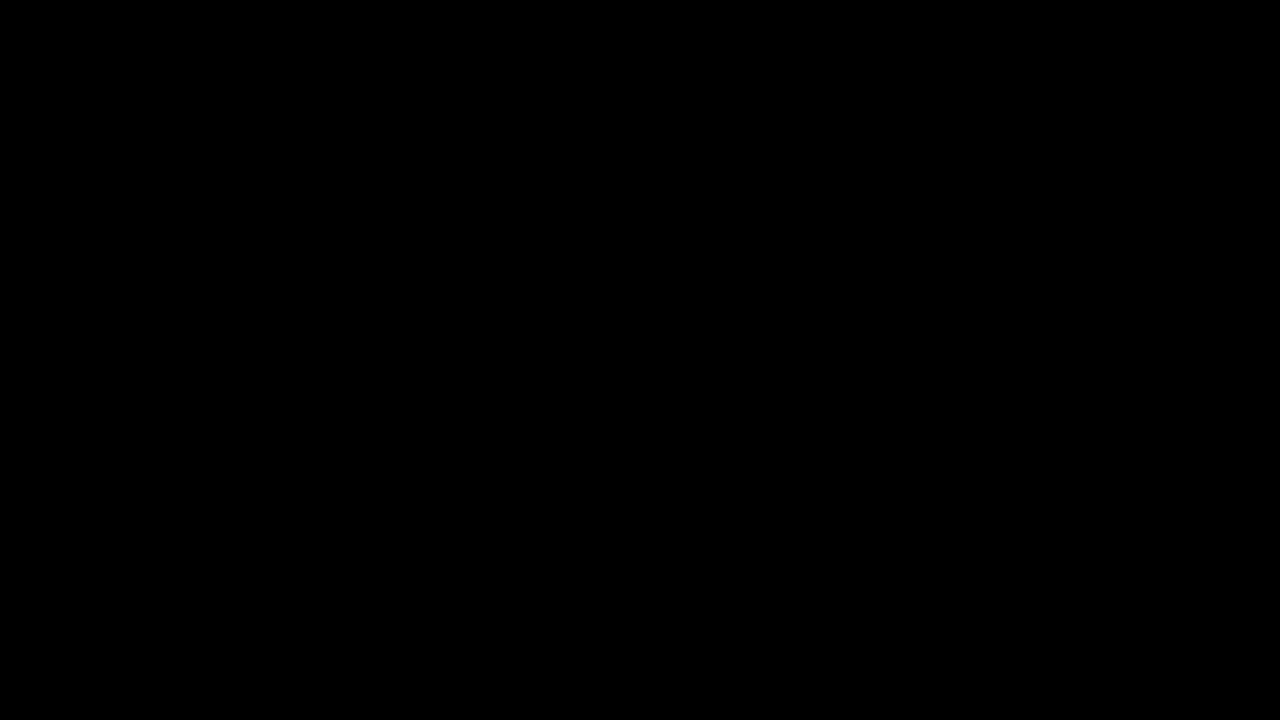

SyntaxError: ignored

In [ ]:
f=cv.VideoCapture('/content/Tree Poses - Yoga Technique.mp4')
ret,output=f.read()
cv2_imshow(output)
if cv.waitKey(1) & 0xFF == ord('q'):
  break